# Profile-Based Retrieval

#### We first install all required packages:

In [1]:
!pip install pandas numpy nltk matplotlib

In [2]:
import pandas as pd
import numpy as np
import string as st
from nltk import WordNetLemmatizer
import matplotlib.pyplot as plt


#### We now import the NLKT library and download all the supplementary data

In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\fedep\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\fedep\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\fedep\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\fedep\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\fedep\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

#### We read our dataset from .csv file

In [4]:
df = pd.read_csv('bbc-text.csv', header=0)
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [5]:
df.shape

(2225, 2)

# Text cleaning and processing steps
* Remove punctuations
* Convert text to tokens
* Remove tokens of length less than or equal to 3
* Remove stopwords using NLTK corpus stopwords list to match
* Apply stemming
* Apply lemmatization
* Convert words to feature vectors

In [6]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [7]:
df['removed_punc'] = df['text'].apply(lambda x: remove_punct(x))
df.head()

,category,text,removed_punc
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...


In [8]:
from nltk.tokenize import word_tokenize
df['tokens'] = df['removed_punc'].apply(lambda msg : word_tokenize(msg.lower()))
df.head()

,category,text,removed_punc,tokens
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [9]:
# Remove tokens of length less than 3",
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [10]:
df['larger_tokens'] = df['tokens'].apply(lambda x : remove_small_words(x))
df.head()

,category,text,removed_punc,tokens,larger_tokens
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[future, hands, viewers, with, home, theatre, ..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, the..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, face, newcastle, premiership, side, ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, office, ocean, twelve, ..."


In [11]:
''' Remove stopwords. Here, NLTK corpus list is used for a match. However, a customized user-defined
    "    list could be created and used to limit the matches in input text.
    "'''
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [12]:
df['clean_tokens'] = df['larger_tokens'].apply(lambda x : remove_stopwords(x))
df.head()

,category,text,removed_punc,tokens,larger_tokens,clean_tokens
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[future, hands, viewers, with, home, theatre, ...","[future, hands, viewers, home, theatre, system..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, the...","[tigers, wary, farrell, gamble, leicester, rus..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, face, newcastle, premiership, side, ...","[yeading, face, newcastle, premiership, side, ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, office, ocean, twelve, ...","[ocean, twelve, raids, office, ocean, twelve, ..."


Lemmatization converts word to it's dictionary base form. This process takes language grammar and vocabulary into consideration while conversion. Hence, it is different from Stemming in that it does not merely truncate the suffixes to get the root word.

In [13]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [14]:
df['lemma_words'] = df['clean_tokens'].apply(lambda x : lemmatize(x))
df.head()

,category,text,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[future, hands, viewers, with, home, theatre, ...","[future, hands, viewers, home, theatre, system...","[future, hand, viewer, home, theatre, system, ..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w...","[worldcom, bos, left, book, alone, former, wor..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, the...","[tigers, wary, farrell, gamble, leicester, rus...","[tiger, wary, farrell, gamble, leicester, rush..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, face, newcastle, premiership, side, ...","[yeading, face, newcastle, premiership, side, ...","[yeading, face, newcastle, premiership, side, ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, office, ocean, twelve, ...","[ocean, twelve, raids, office, ocean, twelve, ...","[ocean, twelve, raid, office, ocean, twelve, c..."


Let us now annotate each token in a document with its Part-Of-Speech tag (note that tokenized FULL sentences are required!)

In [15]:
# Annotate each word with its part-of-speech tag

def get_pos_tag(tokenized_sentence):
    return nltk.pos_tag(tokenized_sentence)

In [16]:
df['pos_tag'] = df['tokens'].apply(lambda x : get_pos_tag(x))
df.head()

,category,text,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words,pos_tag
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[future, hands, viewers, with, home, theatre, ...","[future, hands, viewers, home, theatre, system...","[future, hand, viewer, home, theatre, system, ...","[(tv, NN), (future, NN), (in, IN), (the, DT), ..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w...","[worldcom, bos, left, book, alone, former, wor...","[(worldcom, NN), (boss, NN), (left, VBD), (boo..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, the...","[tigers, wary, farrell, gamble, leicester, rus...","[tiger, wary, farrell, gamble, leicester, rush...","[(tigers, NNS), (wary, VBP), (of, IN), (farrel..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, face, newcastle, premiership, side, ...","[yeading, face, newcastle, premiership, side, ...","[yeading, face, newcastle, premiership, side, ...","[(yeading, VBG), (face, NN), (newcastle, NN), ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, office, ocean, twelve, ...","[ocean, twelve, raids, office, ocean, twelve, ...","[ocean, twelve, raid, office, ocean, twelve, c...","[(ocean, JJ), (s, NN), (twelve, NN), (raids, N..."


In [17]:
# Create sentences to get clean text as input for vectors",
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [18]:
df['clean_text'] = df['lemma_words'].apply(lambda x : return_sentences(x))
df.head()

,category,text,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words,pos_tag,clean_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[future, hands, viewers, with, home, theatre, ...","[future, hands, viewers, home, theatre, system...","[future, hand, viewer, home, theatre, system, ...","[(tv, NN), (future, NN), (in, IN), (the, DT), ...",future hand viewer home theatre system plasma ...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, alone, former, w...","[worldcom, bos, left, book, alone, former, wor...","[(worldcom, NN), (boss, NN), (left, VBD), (boo...",worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, the...","[tigers, wary, farrell, gamble, leicester, rus...","[tiger, wary, farrell, gamble, leicester, rush...","[(tigers, NNS), (wary, VBP), (of, IN), (farrel...",tiger wary farrell gamble leicester rushed mak...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, face, newcastle, premiership, side, ...","[yeading, face, newcastle, premiership, side, ...","[yeading, face, newcastle, premiership, side, ...","[(yeading, VBG), (face, NN), (newcastle, NN), ...",yeading face newcastle premiership side newcas...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, office, ocean, twelve, ...","[ocean, twelve, raids, office, ocean, twelve, ...","[ocean, twelve, raid, office, ocean, twelve, c...","[(ocean, JJ), (s, NN), (twelve, NN), (raids, N...",ocean twelve raid office ocean twelve crime ca...


In [19]:
df = df[['category', 'text', 'clean_text']]

In [20]:
df.head()

,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,future hand viewer home theatre system plasma ...
1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester rushed mak...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle premiership side newcas...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid office ocean twelve crime ca...


### TF-IDF : Term Frequency - Inverse Document Frequency
The term frequency is the number of times a term occurs in a document. Inverse document frequency is an inverse function of the number of documents in which a given word occurs.
The product of these two terms gives tf-idf weight for a word in the corpus. The higher the frequency of occurrence of a word, lower is it's weight and vice-versa. This gives more weightage to rare terms in the corpus and penalizes more commonly occuring terms.

#### Other widely used vectorizer is Count vectorizer which only considers the frequency of occurrence of a word across the corpus.

In [21]:
# Convert lemmatized words to Tf-Idf feature vectors\n",
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_vect = tfidf.fit_transform(df['clean_text'])
tfidf_vect.shape

(2225, 28099)

In [22]:
# Get feature names in the vector
tfidf.get_feature_names_out()

array(['0001', '000300', '00051', ..., 'zutons', 'zvonareva',
       'zvyagintsev'], dtype=object)

In [23]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [24]:
# Calculate average TF-IDF values for each word
average_tfidf = tfidf_vect.mean(axis=0)

# Find words with lowest TF-IDF values
lowest_tfidf_indices = average_tfidf.argsort()[:, :50]  # Change 50 to the desired number of lowest values
feature_names = tfidf.get_feature_names_out()
lowest_tfidf_words = [feature_names[idx] for idx in lowest_tfidf_indices.tolist()[0]]

# Remove words with lowest TF-IDF values from texts and save them in a new column
def remove_lowest_tfidf_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in lowest_tfidf_words]
    return ' '.join(filtered_words)

df['text_with_lowest_tfidf_removed'] = df['clean_text'].apply(remove_lowest_tfidf_words)


In [25]:
words_to_remove = lowest_tfidf_words + ["said"]

# Remove words with lowest TF-IDF values and "said" from texts and save them in a new column
def remove_lowest_tfidf_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in words_to_remove]
    return ' '.join(filtered_words)

df['text_with_lowest_tfidf_removed'] = df['clean_text'].apply(remove_lowest_tfidf_words)

In [26]:
print("Words with lowest TF-IDF values:", lowest_tfidf_words)

Words with lowest TF-IDF values: ['slushy', 'suede', 'coffin', 'buzzcocks', 'halfbaked', 'catergory', 'oversentimental', 'mediocrity', 'mediocre', 'appelas', 'wuthering', 'serene', 'disputing', 'soppy', 'matronic', 'sop', 'lackluster', 'sioux', 'yearsit', 'yearsperhaps', 'bestwe', 'divisionthose', 'biassed', 'orrible', 'hiss', 'mcalmont', 'sisterhood', 'ridiculuous', 'kinky', 'siouxsie', 'pleeease', 'facsimile', 'goodlooks', 'discisions', 'afro', 'bargaining', 'speechless', 'robs', 'robbies', 'presneted', 'snobby', 'nonfans', 'frontwoman', 'brainwashed', 'picnic', 'redifining', 'embarassment', 'artisic', 'slowdance', 'lyrically']


## Apply LDA to find the main topics in the documents


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['text_with_lowest_tfidf_removed'])

# LDA
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Extract top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-51:-1]]))
    print()

Topic 1:
film, game, best, year, award, music, star, number, time, song, actor, band, director, album, movie, play, million, world, oscar, like, chart, prize, sale, british, including, sony, actress, single, gaming, role, singer, artist, festival, record, make, video, people, nomination, title, comedy, series, life, console, week, winner, rock, place, list, studio, 2004

Topic 2:
game, player, england, year, time, world, club, play, match, team, second, wale, ireland, good, final, champion, injury, coach, season, minute, france, week, think, rugby, chelsea, victory, want, great, added, chance, like, make, going, goal, open, league, united, scotland, best, title, sport, nation, played, come, international, start, point, told, playing, know

Topic 3:
year, government, company, market, firm, sale, country, price, economy, share, bank, growth, economic, month, 2004, rate, business, deal, world, china, analyst, rise, plan, group, cost, chief, state, expected, profit, figure, euro, european,

Once we found the main words for 5 topics, label them 

In [28]:
topics = ['entertainment', 'sport', 'business', 'politics', 'tech']

In [29]:
doc_topic_probs = lda.transform(X)

### Extract the most relevant documents for each topic

In [30]:
top_documents_per_topic = {}
for topic_idx, topic in enumerate(topics):
    # Get the indices of documents sorted by their probabilities for the current topic
    top_documents_indices = doc_topic_probs[:, topic_idx].argsort()[::-1]
    
    # Get the IDs of the top documents for the current topic
    top_documents_ids = top_documents_indices[:50]
    
    # Store the IDs of the top documents for the current topic
    top_documents_per_topic[topic] = top_documents_ids

# Print the most relevant documents for each topic
for topic, documents_indices in top_documents_per_topic.items():
    print(f"Topic: {topic}")
    for i, doc_id in enumerate(documents_indices, 1):
        print(f"Document {i} - ID: {doc_id}")
        print(df['text_with_lowest_tfidf_removed'].iloc[doc_id])
        print()
    print()

Topic: entertainment
Document 1 - ID: 1004
critic back aviator oscar martin scorsese aviator best film oscar according leading movie critic several surveyed news website think veteran filmmaker lose best director prize clint eastwood critic tipped jamie foxx hilary swank scoop best actor actress million dollar baby respectively jury comprised expert critic film publication panel also revealed nominee would personally prefer expect aviator best film many think close race scorsese howard hughes biopic eastwood boxing drama million dollar baby film nominated wine comedy sideways factual drama finding neverland charles biopic pretty sure year aviator though choice would sideways observer philip french sideways hope jamie graham total film position shared film 2005 presenter jonathan ross form going oscar point aviator liked million dollar baby dam news editor trade weekly screen international five eight critic tipped scorsese best director dam heat charles gant empire angie errigo plumping

In [31]:
top_documents_per_topic

{'entertainment': array([1004, 1263,  901, 1499, 1874,  961,  298,  858, 1272,  848,  151,
         815,  169, 1041,  373, 1621, 1580,  664, 1037, 1751, 1323, 1002,
        1755,  137,  852,  475, 1708, 1064, 1209,  147,  273, 1042, 1906,
        1548, 1512, 1684,  586, 1077,   26, 1534, 1916,  939, 1705, 2028,
         733,  799, 1290,  369,  372,  296], dtype=int64),
 'sport': array([ 698,  258,  890,  801, 2063,  241,  299, 1498,  830, 1994,  517,
         118, 1996,  279,   97, 1878, 1229, 1291,  773, 1294,   57, 2088,
        1045,  490, 2172,  872,  146, 1699,  453,  892,  850,  442,  795,
        2014, 1423,  688, 2151,  789, 1430, 1402, 1326, 1576,   58, 1118,
        1243, 1728, 1794, 1761, 1316,  927], dtype=int64),
 'business': array([1194, 1810,  318,  140,  779, 1495, 1230,  639, 1882,  497,  563,
        1104, 2104, 2163,  966, 1087, 2033,  295,  178, 1370, 1352, 1117,
         923,  403, 1079, 1321, 2000, 1251,  430,  778, 1560, 1109,  704,
        2022,  958,  157, 1376

## Example users
Define the users and their respective topics of interest

In [32]:

users = {
    'user1': 'entertainment',
    'user2': 'tech business',
    'user3': 'politics',
    'user4': 'business politics',
    'user5': 'sport'
}

Create a dictionary with the top 50 documents for each user

In [33]:
top_documents_per_user = {}

for user, topics_of_interest in users.items():
    top_documents_per_user[user] = []
    topics_of_interest = topics_of_interest.split()
    if len(topics_of_interest) > 1:
        for topic in topics_of_interest:
            top_documents_per_user[user].extend(top_documents_per_topic[topic][:25])
        
        top_documents_per_user[user] = np.array(top_documents_per_user[user])

    else: 
        top_documents_per_user[user] = top_documents_per_topic[topics_of_interest[0]]
    

Print the most relevant documents for each user

In [34]:
for user, documents_indices in top_documents_per_user.items():
    topic = users[user]
    print(f"User: {user}")
    print(f"Topics of interest: {topic}")
    for i, doc_id in enumerate(documents_indices, 1):
        print(f"Document {i} - ID: {doc_id}")
        print(df['text_with_lowest_tfidf_removed'].iloc[doc_id])
        print()
    print()

User: user1
Topics of interest: entertainment
Document 1 - ID: 1004
critic back aviator oscar martin scorsese aviator best film oscar according leading movie critic several surveyed news website think veteran filmmaker lose best director prize clint eastwood critic tipped jamie foxx hilary swank scoop best actor actress million dollar baby respectively jury comprised expert critic film publication panel also revealed nominee would personally prefer expect aviator best film many think close race scorsese howard hughes biopic eastwood boxing drama million dollar baby film nominated wine comedy sideways factual drama finding neverland charles biopic pretty sure year aviator though choice would sideways observer philip french sideways hope jamie graham total film position shared film 2005 presenter jonathan ross form going oscar point aviator liked million dollar baby dam news editor trade weekly screen international five eight critic tipped scorsese best director dam heat charles gant emp

## Evaluation

In [35]:
def gen_eval_dataset(nq=0, nd=0):
    if nq==0:
        nq=np.random.randint(2,4)
    Q=[]
    R=[]
    if nd==0:
        nd=np.random.randint(3,7)
    def generate(nd):
        keep=True
        while keep:
            Q_=1+np.random.permutation(nd)
            val=np.random.rand(1)*.2+.4
            R_=np.sign(np.random.rand(nd)-val)
            keep= np.abs(np.sum(R_))==nd
        return Q_, R_
    for q in range(nq):
        Q_, R_=generate(nd)
        R.append(R_) 
        Q.append(Q_)
    return Q, R

In [36]:
def generate_ranking(nq, nd):
    Q,R=random_evaluations(nq,nd)
    nq=len(Q)
    nd=len(Q[0])
    print('Your IR system was issued %d queries from users'%nq)
    print('Here are the top %d results your IR system retrieved for each query, '%nd+\
          'together with the relevance judgements')
    header=['q%d\tRel\t\t'%(q+1) for q in range(nq)]
    print('d\t'+''.join(header))
    for d in range(nd):
        row=['%d\t%d\t\t'%(Q[q][d]+1,1 if R[q][d]==1 else 0) for q in range(nq)]
        print('#%d\t'%(d+1)+''.join(row))
    return Q, R


In [37]:
def evaluate(ex,Q,R):
    nq=len(Q)
    nd=len(Q[0])
    R_=np.array(R)
    R_=.5*(R_+1)
    Prec_tot=[]
    Rec_tot=[]    
    def compute_PR(print_screen=True):
        Prec_tot=[]
        Rec_tot=[]        
        if print_screen:
            print('Precision and Recall at k for k=1,...,%d'%nd)      
        for q in range(nq):
            q1=q+1
            r=R_[q,:]
            if print_screen:
                print('\tQuery %d'%q1)
            Prec_q=[]
            Rec_q=[]
            for k in range(nd):
                k1=k+1
                Prec=np.sum(r[:k1])/k1
                Rec=np.sum(r[:k1])/np.sum(r)                
                if print_screen:                    
                    print('\t\tP(%d)=%d/%d=%.2f,\tR(%d)=%d/%d=%.2f'\
                     %(k1, np.sum(r[:k1]), k1, Prec, k1, np.sum(r[:k1]),np.sum(r),Rec))
                Prec_q.append(Prec)
                Rec_q.append(Rec)
            Prec_tot.append(Prec_q)
            Rec_tot.append(Rec_q)
        Prec_tot=np.array(Prec_tot)
        Rec_tot=np.array(Rec_tot)
        return Prec_tot, Rec_tot
    def compute_TPFP(TP_rate=None):
        TP_tot=[]        
        FP_tot=[]        
        print('TP_rate and FP_rate at k for k=1,...,%d'%nd)      
        for q in range(nq):
            q1=q+1
            r=R_[q,:]
            nr=1-r
            print('\tQuery %d'%q1)
            TP_q=[]
            FP_q=[]
            for k in range(nd):
                k1=k+1
                TP=np.sum(r[:k1])/np.sum(r)                
                FP=np.sum(nr[:k1])/np.sum(nr)
                
                print('\t\tTP_rate(%d)=R(%d)=%d/%d=%.2f\t FP_rate(%d)=%d/%d=%.2f\t'\
                     %(k1, k1, np.sum(r[:k1]),np.sum(r),TP, k1,np.sum(nr[:k1]),np.sum(nr),FP))
                TP_q.append(TP)
                FP_q.append(FP)
            TP_tot.append(TP_q)
            FP_tot.append(FP_q)
        TP_tot=np.array(TP_tot)
        FP_tot=np.array(FP_tot)
        return TP_tot, FP_tot        
    if ex=='prec_rec' or ex=='all':        
        Prec_tot, Rec_tot=compute_PR()
        print('\n Draw the Precision-Recall curve for each query')  
        for q in range(nq):
            q1=q+1
            print('\tQuery %d'%q1)            
            plt.figure()
            Rec_q=Rec_tot[q,:]
            Prec_q=Prec_tot[q,:]
            plt.scatter(np.array(Rec_q), np.array(Prec_q))
            plt.plot(np.array(Rec_q), np.array(Prec_q),label='Precision-Recall curve')            
            plt.xlim([-0.05,1.05]); plt.ylim([-0.05,1.05])
            plt.xlabel('Recall'); plt.ylabel('Precision')
            R_int=np.hstack([0,Rec_q,1])
            P_int=np.zeros(R_int.size)
            for i_r in range(R_int.size-1):
                r=R_int[i_r]
                if i_r!=0 and R_int[i_r+1]==r:
                    P_int[i_r]=np.max(Prec_q[i_r-1:])    
                else:
                    P_int[i_r]=np.max(Prec_q[i_r:])            
            plt.plot(R_int,P_int,color='r',label='Interpolated PR curve')
            plt.legend(loc='lower left')
            plt.show()
    if ex=='r-prec' or ex=='all':        
        if len(Prec_tot) == 0:
            Prec_tot, Rec_tot=compute_PR()
        print('\n Determine R-precision for each query') 
        for q in range(nq):            
            Rec_q=Rec_tot[q,:]
            Prec_q=Prec_tot[q,:]
            r=int(np.sum(R_[q]))
            q1=q+1
            print('\tQuery %d'%q1)
            print('\t\tNumber of relevant documents: %d --> P(%d)=%.2f'%(r,r,Prec_q[r-1]))
    if ex=='map' or ex=='all':        
        if len(Prec_tot)== 0:
            Prec_tot, Rec_tot=compute_PR()
        print('\n Calculate the Mean Average Precision')
        APs=[]
        for q in range(nq):            
            Prec_q=Prec_tot[q,:]            
            r=int(np.sum(R_[q]))
            q1=q+1
            print('\tQuery %d'%q1)
            str_formula='1/%d '%r
            rs=np.where(R_[q]==1)[0]+1
            str_formula+='{' + ' + '.join(['P(%d)'%rs_ for rs_ in rs]) + '}'
            AP=np.mean(Prec_q[np.where(R_[q]==1)])            
            print('\t\tAP=%s=%.2f'%(str_formula, AP))
            APs.append(AP)
        APstring='1/%d {'%nq
        APstring+= ' + '.join(['AP_%d'%(q+1) for q in range(nq)]) 
        APstring+='}=1/%d {'%nq
        APstring+= ' + '.join(['%.2f'%(AP) for AP in APs]) 
        APstring+='}'        
        print('\tMAP=%s=%.2f'%(APstring, np.mean(np.array(APs))))
    if ex=='roc' or ex=='all' or ex=='auc':
        TP_tot, FP_tot=compute_TPFP()    
        print('\n Draw the ROC curve for each query')  
        for q in range(nq):
            q1=q+1
            print('\tQuery %d'%q1)            
            plt.figure()
            TP_q=TP_tot[q,:]
            FP_q=FP_tot[q,:]
            plt.scatter(np.array(FP_q), np.array(TP_q))
            TP_q_=np.hstack([0,TP_q,1])
            FP_q_=np.hstack([0,FP_q,1])
            plt.plot(np.array(FP_q_), np.array(TP_q_),label='ROC curve')            
            plt.xlim([-0.05,1.05]); plt.ylim([-0.05,1.05])
            plt.xlabel('FP rate'); plt.ylabel('TP rate')
            plt.show()
            if ex=='auc' or ex=='all':
                AUC=[]
                for i_x in range(TP_q_.size-1):
                    delta_x=FP_q_[i_x+1]-FP_q_[i_x]
                    base=TP_q_[i_x+1]+TP_q_[i_x]
                    AUC.append(base*delta_x/2)
                AUC=np.array(AUC)
                AUC=AUC[AUC>0]
                string_AUC=' + '.join(['%.2f'%auc for auc in AUC])
                if string_AUC!='':
                    string_AUC+=' = '    
                print('\tAUC = %s %.2f\n\n'%(string_AUC, np.sum(AUC)))            
    if ex=='clear':
        return
    else:
        return Prec_tot, Rec_tot 

### Calculate the predicted categories using the results of the topic modelling

In [38]:
categories = list(df['category'].unique())

In [39]:
real_categories = []
predicted_categories = []

In [40]:
for item in top_documents_per_user.items():
    for doc in item[1]:
        real_categories.append(df['category'].iloc[doc])
        predicted_categories.append(users[item[0]])


### Compare the queries with the results, considering the queries the preferencies of each user and the results our predicted categories based on the topic modelling.
#### The prediction will be considered correct if the documents returned for a specific interest have been classified correctly, comparing the initial labels

In [41]:
Q = np.ones((1, len(real_categories)), dtype=int)

R = []
for i in range(len(predicted_categories)):
    pred = predicted_categories[i].split()
    real = real_categories[i].split()
    if any(word in pred for word in real):
        R.append(1)
    else: 
        R.append(0)

R = np.array([R])


Calculate precision and recall using the eval function

Precision and Recall at k for k=1,...,250
	Query 1
		P(1)=1/1=1.00,	R(1)=1/222=0.00
		P(2)=2/2=1.00,	R(2)=2/222=0.01
		P(3)=3/3=1.00,	R(3)=3/222=0.01
		P(4)=4/4=1.00,	R(4)=4/222=0.02
		P(5)=5/5=1.00,	R(5)=5/222=0.02
		P(6)=6/6=1.00,	R(6)=6/222=0.03
		P(7)=7/7=1.00,	R(7)=7/222=0.03
		P(8)=8/8=1.00,	R(8)=8/222=0.04
		P(9)=9/9=1.00,	R(9)=9/222=0.04
		P(10)=9/10=0.95,	R(10)=9/222=0.04
		P(11)=10/11=0.91,	R(11)=10/222=0.05
		P(12)=10/12=0.88,	R(12)=10/222=0.05
		P(13)=11/13=0.88,	R(13)=11/222=0.05
		P(14)=12/14=0.89,	R(14)=12/222=0.06
		P(15)=13/15=0.90,	R(15)=13/222=0.06
		P(16)=14/16=0.91,	R(16)=14/222=0.07
		P(17)=15/17=0.91,	R(17)=15/222=0.07
		P(18)=16/18=0.92,	R(18)=16/222=0.07
		P(19)=17/19=0.92,	R(19)=17/222=0.08
		P(20)=18/20=0.93,	R(20)=18/222=0.08
		P(21)=19/21=0.93,	R(21)=19/222=0.09
		P(22)=20/22=0.93,	R(22)=20/222=0.09
		P(23)=21/23=0.91,	R(23)=21/222=0.09
		P(24)=21/24=0.90,	R(24)=21/222=0.10
		P(25)=22/25=0.90,	R(25)=22/222=0.10
		P(26)=23/26=0.90,	R(26)=23/222=0.11
		P(27)=

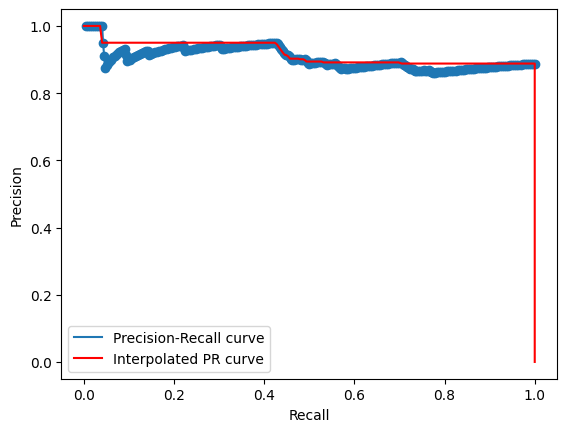


 Determine R-precision for each query
	Query 1
		Number of relevant documents: 222 --> P(222)=0.87

 Calculate the Mean Average Precision
	Query 1
		AP=1/222 {P(1) + P(2) + P(3) + P(4) + P(5) + P(6) + P(7) + P(8) + P(9) + P(13) + P(14) + P(15) + P(16) + P(17) + P(18) + P(19) + P(20) + P(21) + P(22) + P(25) + P(26) + P(27) + P(28) + P(29) + P(30) + P(31) + P(32) + P(33) + P(34) + P(36) + P(37) + P(38) + P(39) + P(40) + P(41) + P(42) + P(43) + P(44) + P(45) + P(46) + P(47) + P(48) + P(49) + P(50) + P(51) + P(52) + P(55) + P(56) + P(57) + P(58) + P(59) + P(60) + P(61) + P(62) + P(63) + P(64) + P(65) + P(66) + P(67) + P(68) + P(69) + P(70) + P(71) + P(74) + P(75) + P(76) + P(77) + P(78) + P(79) + P(80) + P(81) + P(82) + P(83) + P(84) + P(85) + P(86) + P(87) + P(88) + P(89) + P(90) + P(91) + P(92) + P(93) + P(94) + P(95) + P(96) + P(97) + P(98) + P(99) + P(100) + P(110) + P(115) + P(116) + P(117) + P(118) + P(120) + P(121) + P(126) + P(127) + P(128) + P(129) + P(130) + P(131) + P(132) + P(

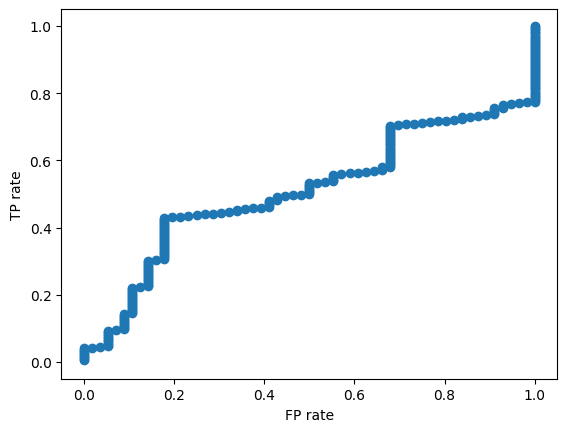

	AUC = 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 + 0.01 =  0.51


Precision: [[1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.95       0.90909091 0.875
  0.88461538 0.89285714 0.9        0.90625    0.91176471 0.91666667
  0.92105263 0.925      0.92857143 0.93181818 0.91304348 0.89583333
  0.9        0.90384615 0.90740741 0.91071429 0.9137931  0.91666667
  0.91935484 0.921875   0.92424242 0.92647059 0.91428571 0.91666667
  0.91891892 0.92105263 0.92307692 0.925      0.92682927 0.92857143
  0.93023256 0.93181818 0.93333333 0.93478261 0.93617021 0.9375
  0.93877551 0.94       0.94117647 0.94230769 0.9339622

In [42]:
precision, recall = evaluate('all', Q, R)


print("Precision:", precision)
print("Recall:", recall)

# Second Version - Use selected words to identify documents 

## We asked ChatGPT to give us a list of the 50 most appropriate words to each of the given topics and saved them in words.txt file

In [43]:
words_topic = {}

### Reading the words and for each topic creating the list of words

In [44]:
with open('words.txt', 'r') as gpt_words:
    for line in gpt_words:
        words = line.strip().split(',')
        words_topic[words[0]] = words[1:]

In [45]:
tfidf_vect.toarray().shape
tfidf_arr = tfidf_vect.toarray()

### Creating the TF-IDF vectors matrix

In [46]:
tokens = []
for i, feature in enumerate(tfidf.get_feature_names_out()):
    tokens.append(feature)
tfidf_matrix = pd.DataFrame(tfidf_arr, columns = tokens)
tfidf_matrix.iloc[:,8000:]

,devil,devine,devise,devised,devlin,devoices,devoid,devolved,devon,devonish,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
doc_vect = tfidf.fit_transform(df["clean_text"])

### Creating a list of keyword lists for each user

In [48]:
users_keywords = []
for index, i in enumerate(users.keys()):
    split = users[i].strip().split()
    if len(split) == 1:
        users_keywords.append(words_topic[split[0]])
    else:
        users_keywords.append(words_topic[split[0]]+words_topic[split[1]])

In [49]:
print(users_keywords)

[['film', 'music', 'television', 'hollywood', 'celebrities', 'actor', 'actress', 'director', 'star', 'entertainment', 'showbiz', 'celebrity', 'performance', 'premiere', 'boxoffice', 'streaming', 'blockbuster', 'drama', 'comedy', 'action', 'romance', 'thriller', 'awards', 'oscars', 'grammy', 'emmy', 'festival', 'redcarpet', 'popculture', 'critic', 'reviews', 'audience', 'fan', 'fanbase', 'script', 'screenplay', 'plot', 'character', 'plottwist', 'production', 'behind-the-scenes', 'rehearsal', 'premiere', 'opening', 'closing', 'director', 'producer', 'screenwriter', 'cinematography'], ['technology', 'innovation', 'gadgets', 'startups', 'ai', 'cybersecurity', 'blockchain', 'data', 'internet', 'software', 'hardware', 'apps', 'digital', 'automation', 'vr', 'ar', 'iot', 'cloud', 'robotics', 'machinelearning', 'cryptocurrency', 'e-commerce', 'privacy', 'siliconvalley', 'bigdata', '5g', 'biotech', 'quantum', 'chip', 'nanotech', 'wearables', 'gaming', 'streaming', 'socialmedia', 'platform', 'int

### Creating a list of users vectors

In [50]:
users_vect = []
for i in users_keywords:
    users_vect.append(tfidf.transform([" ".join(i)]))

In [51]:
users_vect
doc_vect

<2225x28099 sparse matrix of type '<class 'numpy.float64'>'
	with 308663 stored elements in Compressed Sparse Row format>

## Getting most appropriate documents for each user

### Creating a DataFrame to get similarity of each document with users keywords

In [52]:
sim_df = pd.DataFrame(columns=['articleId', 'clean_text','user1', 'user2', 'user3', 'user4', 'user5', 'category'])
sim_df['articleId'] = df.index
sim_df['clean_text'] = df['clean_text']
sim_df['category'] = df['category']

In [53]:
sim_df

,articleId,clean_text,user1,user2,user3,user4,user5,category
0,0,future hand viewer home theatre system plasma ...,NaN,NaN,NaN,NaN,NaN,tech
1,1,worldcom bos left book alone former worldcom b...,NaN,NaN,NaN,NaN,NaN,business
2,2,tiger wary farrell gamble leicester rushed mak...,NaN,NaN,NaN,NaN,NaN,sport
3,3,yeading face newcastle premiership side newcas...,NaN,NaN,NaN,NaN,NaN,sport
4,4,ocean twelve raid office ocean twelve crime ca...,NaN,NaN,NaN,NaN,NaN,entertainment
...,...,...,...,...,...,...,...,...
2220,2220,car pull retail figure retail sale fell januar...,NaN,NaN,NaN,NaN,NaN,business
2221,2221,kilroy unveils immigration policy exchatshow h...,NaN,NaN,NaN,NaN,NaN,politics
2222,2222,announce glasgow concert band announced plan p...,NaN,NaN,NaN,NaN,NaN,entertainment
2223,2223,political squabble snowball become commonplace...,NaN,NaN,NaN,NaN,NaN,politics


### Filling the DataFrame just created with similarity values

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
df_index = 2
for i in range(len(users_vect)):
    sim_list = []
    for j in range(len(list(doc_vect))):
        sim = cosine_similarity(users_vect[i], doc_vect[j])
        sim_list.append(sim[0][0])
    sim_df[sim_df.columns[df_index]] = sim_list
    df_index+=1



In [55]:
sim_df.head()

,articleId,clean_text,user1,user2,user3,user4,user5,category
0,0,future hand viewer home theatre system plasma ...,0.008437,0.047931,0.002758,0.019559,0.002374,tech
1,1,worldcom bos left book alone former worldcom b...,0.003236,0.006282,0.000000,0.006266,0.003047,business
2,2,tiger wary farrell gamble leicester rushed mak...,0.000000,0.000000,0.004277,0.003314,0.026407,sport
3,3,yeading face newcastle premiership side newcas...,0.000000,0.000000,0.000000,0.000000,0.034976,sport
4,4,ocean twelve raid office ocean twelve crime ca...,0.034450,0.000000,0.007142,0.005533,0.000000,entertainment


#### Top Entertainment documents (related to User 1)

In [56]:
usr_res = sim_df.sort_values('user1', ascending=False)
usr_res[:4]['clean_text']

664     premiere ring musical producer behind lord rin...
273     critic laud comedy sideways road trip comedy s...
364     bangkok film festival battle organiser third b...
1073    sundance honour foreign film international fil...
Name: clean_text, dtype: object

#### Top Tech Business documents (related to User 2)

In [57]:
usr_res = sim_df.sort_values('user2', ascending=False)
usr_res[:4]['clean_text']

1373    economy facing major risk manufacturing sector...
1254    israeli economy picking pace israel economy fo...
1649    trade ballooned october trade deficit widened ...
514     regulation still possible blurring boundary in...
Name: clean_text, dtype: object

## Getting most appropriate users for each document

In [58]:
threshold = 0.025
doc_users_dict = {}

### Filling dictionary just created with users interested in document for each document index

In [59]:
# doc_index is index of document chosen
# show param determines if need to print users selection or not
def get_interested(doc_index, show=False):
    list_sim = []
    perfiles = []
    topics_usr = []

    for j in range(len(users_vect)):
        similarities = cosine_similarity(doc_vect[doc_index], users_vect[j]) # Computes the distance of cosine between document and user vectors
        perfiles.append(j+1)
        topics_usr.append(users[list(users.keys())[j]])
        list_sim.append(similarities[0][0])

    # Creates a DataFrame with information retrieved and ranks users by score

    ranking = pd.DataFrame()
    ranking["users"] = perfiles
    ranking['topics'] = topics_usr
    ranking["score"] = list_sim
    ranking = ranking.sort_values('score', ascending=False)
    
    index_max = ranking['score'].idxmax()
    row_max = ranking.loc[index_max]
    
    # Prints information about previous process
    if show:
        print("Document",df.iloc[doc_index], ":", df.iloc[doc_index]["text"])
        print('Actual Topic: ', df['category'][doc_index], '-- Most Appropriate User Topics: ', row_max['topics'])
        print()
        print('Ranking')
        print(ranking)
        for index, row in ranking.iterrows():
            if row.iloc[2] > threshold:
                print('Most Interested User: ', row.iloc[0])
    
    # Creates a list with most suitable users for document
    # User with more than 0.010 of similarity are selected as suitable, if none, highest score is selected
    interested_users = []
    for index, row in ranking.iterrows():
        if row.iloc[2] > threshold:
            interested_users.append(row.iloc[0])
        if len(interested_users) == 0:
            interested_users.append(row_max.iloc[0])
    doc_users_dict[doc_index] = interested_users
    

### Selecting random document from DataFrame

In [99]:
df.iloc[51]['clean_text']

'strike threat pension plan million public service worker could strike minister scrap final salary pension scheme make work longer warn union leader cabinet office confirmed reviewing current pension system prompting union representing worker threaten united action believe plan include raising mandatory retirement public service worker government say union consulted change made thought proposed overhaul thursday could mean pension could based career average salary year served staff currently eightieth highest salary final three year minister anxious avoid mass strike action leadup next general election widely expected next statement sunday cabinet office said reviewing civil service pension scheme hoped announce proposal soon union course consulted proposed change public sector pension scheme need remain affordable sustainable people living longer pension getting expensive maintain longterm affordability pension scheme government announced green paper pension pension would rise monday 

In [98]:
import random
random_index = random.randint(0, len(df["clean_text"])-1)
get_interested(random_index, True)

Document category                                                                   politics
text                              strike threat over pension plans millions of p...
clean_text                        strike threat pension plan million public serv...
text_with_lowest_tfidf_removed    strike threat pension plan million public serv...
Name: 51, dtype: object : strike threat over pension plans millions of public service workers could strike if ministers scrap their final salary pension scheme and make them work longer  warn union leaders.  the cabinet office has confirmed it is reviewing the current pension system  prompting unions representing 4.5m workers to threaten united action. they believe the plans include raising the mandatory retirement age for public service workers from 60 to 65. the government says unions will be consulted before any changes are made.  it is thought the proposed overhaul  due on thursday  could mean pensions could be based on a  career average  sala

### Filling dictionary with most appropriate users for each document

In [61]:
for index, row in df.iterrows():
    get_interested(index)

## Evaluation

### Evaluating general accuracy of the method, comparing users selected topics with category of document

#### loose version assures that user with the highest score is interested in the document topic, regardless of the threshold
#### strict version (with loose=False) checks that all the users selected are interested in the document topic

In [62]:
def evaluate_all(loose=True):
    users_topics_list = list(users.keys())
    correct = 0
    for i in range(len(df)):
        all_chosen = True
        user_chosen = doc_users_dict[i]
        stop = len(user_chosen)
        if loose:
            stop = 1
        
        for j in range(stop):
            if df.iloc[i]['category'] not in users[users_topics_list[user_chosen[j]-1]]:
                all_chosen = False
        if all_chosen:
            correct = correct + 1
    return correct/len(df)


In [63]:
print("Loose Accuracy: ", evaluate_all())
print("Strict Accuracy: ", evaluate_all(False))

Loose Accuracy:  0.856629213483146
Strict Accuracy:  0.7802247191011236


In [64]:
q=[]
r=[]

for i in range(len(users.keys())):
    qi = sim_df.sort_values(list(users.keys())[i], ascending=False)
    ri = qi['category'].str.contains(list(users.values())[i]) 

    q.append(qi)
    r.append(ri)

Precision and Recall at k for k=1,...,2225
	Query 1
		P(1)=1/1=1.00,	R(1)=1/1305=0.00
		P(2)=2/2=1.00,	R(2)=2/1305=0.00
		P(3)=3/3=1.00,	R(3)=3/1305=0.00
		P(4)=4/4=1.00,	R(4)=4/1305=0.00
		P(5)=5/5=1.00,	R(5)=5/1305=0.00
		P(6)=6/6=1.00,	R(6)=6/1305=0.00
		P(7)=7/7=1.00,	R(7)=7/1305=0.01
		P(8)=8/8=1.00,	R(8)=8/1305=0.01
		P(9)=9/9=1.00,	R(9)=9/1305=0.01
		P(10)=10/10=1.00,	R(10)=10/1305=0.01
		P(11)=11/11=1.00,	R(11)=11/1305=0.01
		P(12)=11/12=0.96,	R(12)=11/1305=0.01
		P(13)=12/13=0.96,	R(13)=12/1305=0.01
		P(14)=13/14=0.96,	R(14)=13/1305=0.01
		P(15)=14/15=0.97,	R(15)=14/1305=0.01
		P(16)=15/16=0.97,	R(16)=15/1305=0.01
		P(17)=16/17=0.97,	R(17)=16/1305=0.01
		P(18)=17/18=0.97,	R(18)=17/1305=0.01
		P(19)=18/19=0.97,	R(19)=18/1305=0.01
		P(20)=19/20=0.97,	R(20)=19/1305=0.01
		P(21)=20/21=0.98,	R(21)=20/1305=0.02
		P(22)=21/22=0.98,	R(22)=21/1305=0.02
		P(23)=22/23=0.98,	R(23)=22/1305=0.02
		P(24)=23/24=0.98,	R(24)=23/1305=0.02
		P(25)=24/25=0.98,	R(25)=24/1305=0.02
		P(26)=25/26=0.98

		P(2212)=1314/2212=0.59,	R(2212)=1314/1321=1.00
		P(2213)=1315/2213=0.59,	R(2213)=1315/1321=1.00
		P(2214)=1315/2214=0.59,	R(2214)=1315/1321=1.00
		P(2215)=1316/2215=0.59,	R(2215)=1316/1321=1.00
		P(2216)=1316/2216=0.59,	R(2216)=1316/1321=1.00
		P(2217)=1317/2217=0.59,	R(2217)=1317/1321=1.00
		P(2218)=1317/2218=0.59,	R(2218)=1317/1321=1.00
		P(2219)=1318/2219=0.59,	R(2219)=1318/1321=1.00
		P(2220)=1318/2220=0.59,	R(2220)=1318/1321=1.00
		P(2221)=1319/2221=0.59,	R(2221)=1319/1321=1.00
		P(2222)=1319/2222=0.59,	R(2222)=1319/1321=1.00
		P(2223)=1320/2223=0.59,	R(2223)=1320/1321=1.00
		P(2224)=1320/2224=0.59,	R(2224)=1320/1321=1.00
		P(2225)=1321/2225=0.59,	R(2225)=1321/1321=1.00
	Query 4
		P(1)=0/1=0.50,	R(1)=0/1112=0.00
		P(2)=1/2=0.50,	R(2)=1/1112=0.00
		P(3)=1/3=0.50,	R(3)=1/1112=0.00
		P(4)=2/4=0.50,	R(4)=2/1112=0.00
		P(5)=2/5=0.50,	R(5)=2/1112=0.00
		P(6)=3/6=0.50,	R(6)=3/1112=0.00
		P(7)=3/7=0.50,	R(7)=3/1112=0.00
		P(8)=4/8=0.50,	R(8)=4/1112=0.00
		P(9)=4/9=0.50,	R(9)=4/1112=0.00

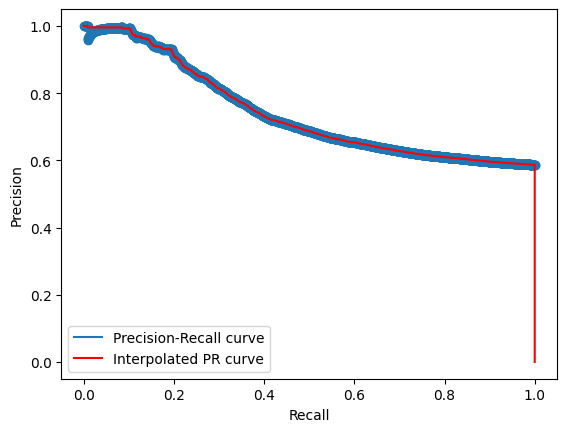

	Query 2


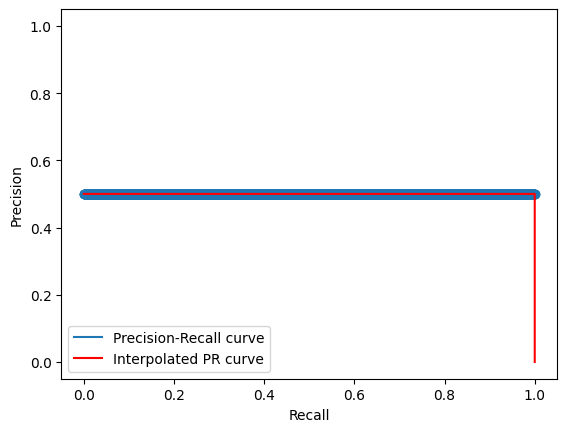

	Query 3


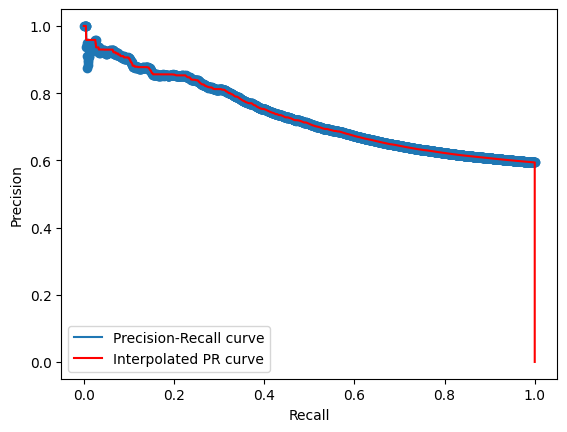

	Query 4


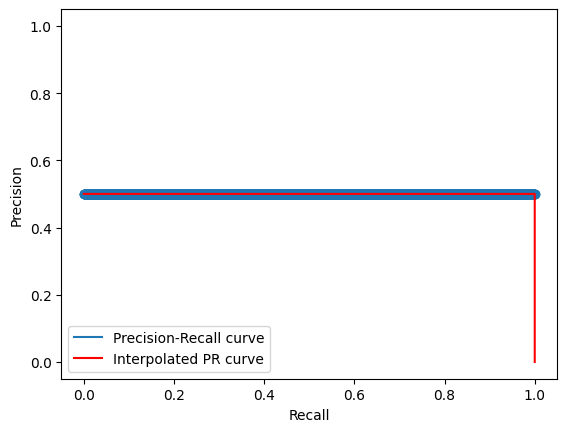

	Query 5


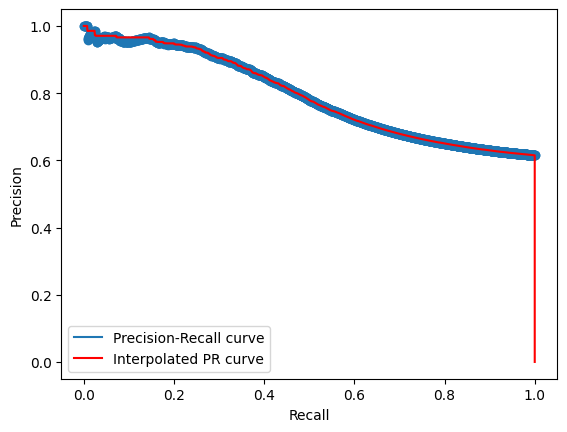


 Determine R-precision for each query
	Query 1
		Number of relevant documents: 1305 --> P(1305)=0.64
	Query 2
		Number of relevant documents: 1112 --> P(1112)=0.50
	Query 3
		Number of relevant documents: 1321 --> P(1321)=0.66
	Query 4
		Number of relevant documents: 1112 --> P(1112)=0.50
	Query 5
		Number of relevant documents: 1368 --> P(1368)=0.68

 Calculate the Mean Average Precision
	Query 1
		AP=1/1305 {P(1) + P(2) + P(3) + P(4) + P(5) + P(6) + P(7) + P(8) + P(9) + P(10) + P(11) + P(13) + P(14) + P(15) + P(16) + P(17) + P(18) + P(19) + P(20) + P(21) + P(22) + P(23) + P(24) + P(25) + P(26) + P(27) + P(28) + P(29) + P(30) + P(31) + P(32) + P(33) + P(34) + P(35) + P(36) + P(37) + P(38) + P(39) + P(40) + P(41) + P(42) + P(43) + P(44) + P(45) + P(46) + P(47) + P(48) + P(49) + P(50) + P(51) + P(52) + P(53) + P(54) + P(55) + P(56) + P(57) + P(58) + P(59) + P(60) + P(61) + P(62) + P(63) + P(64) + P(65) + P(66) + P(67) + P(68) + P(69) + P(70) + P(71) + P(72) + P(73) + P(74) + P(75) + P(

c:\Users\fedep\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\fedep\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


		TP_rate(848)=R(848)=424/1112=0.38	 FP_rate(848)=424/1112=0.38	
		TP_rate(849)=R(849)=424/1112=0.38	 FP_rate(849)=424/1112=0.38	
		TP_rate(850)=R(850)=425/1112=0.38	 FP_rate(850)=425/1112=0.38	
		TP_rate(851)=R(851)=425/1112=0.38	 FP_rate(851)=425/1112=0.38	
		TP_rate(852)=R(852)=426/1112=0.38	 FP_rate(852)=426/1112=0.38	
		TP_rate(853)=R(853)=426/1112=0.38	 FP_rate(853)=426/1112=0.38	
		TP_rate(854)=R(854)=427/1112=0.38	 FP_rate(854)=427/1112=0.38	
		TP_rate(855)=R(855)=427/1112=0.38	 FP_rate(855)=427/1112=0.38	
		TP_rate(856)=R(856)=428/1112=0.38	 FP_rate(856)=428/1112=0.38	
		TP_rate(857)=R(857)=428/1112=0.39	 FP_rate(857)=428/1112=0.39	
		TP_rate(858)=R(858)=429/1112=0.39	 FP_rate(858)=429/1112=0.39	
		TP_rate(859)=R(859)=429/1112=0.39	 FP_rate(859)=429/1112=0.39	
		TP_rate(860)=R(860)=430/1112=0.39	 FP_rate(860)=430/1112=0.39	
		TP_rate(861)=R(861)=430/1112=0.39	 FP_rate(861)=430/1112=0.39	
		TP_rate(862)=R(862)=431/1112=0.39	 FP_rate(862)=431/1112=0.39	
		TP_rate(863)=R(863)=431

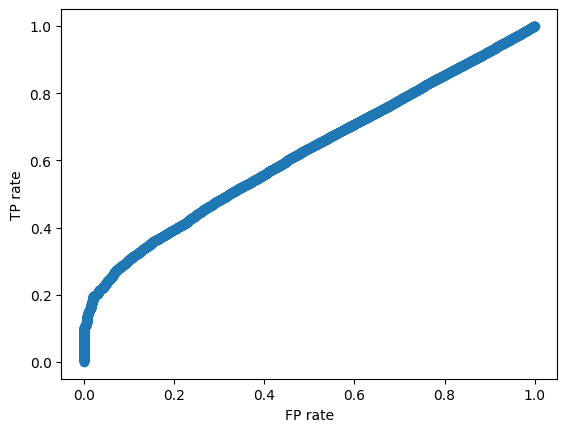

	AUC = 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 +

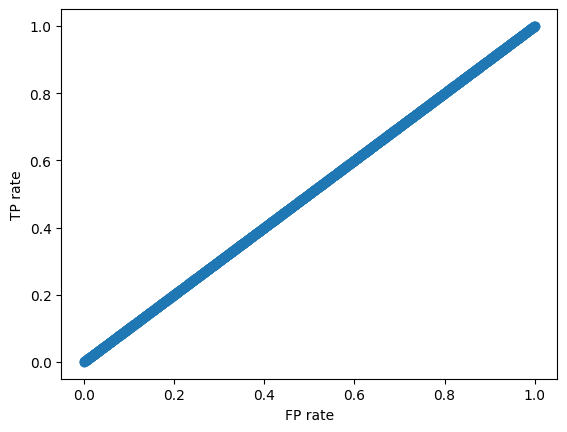

	AUC = 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 +

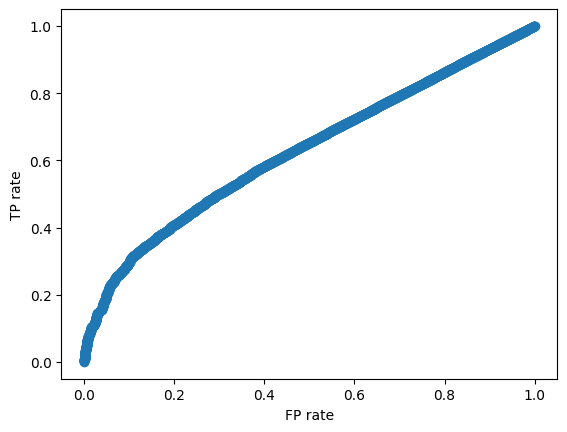

	AUC = 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 +

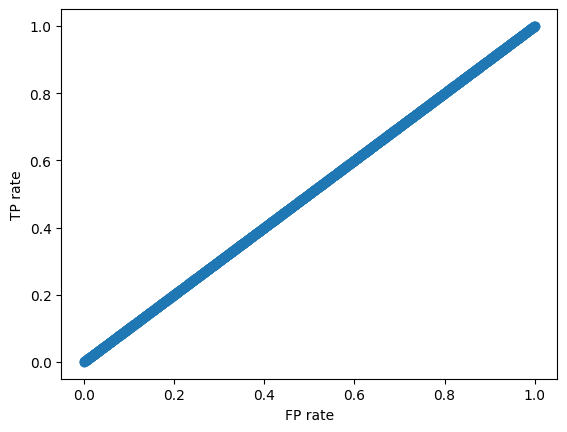

	AUC = 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 +

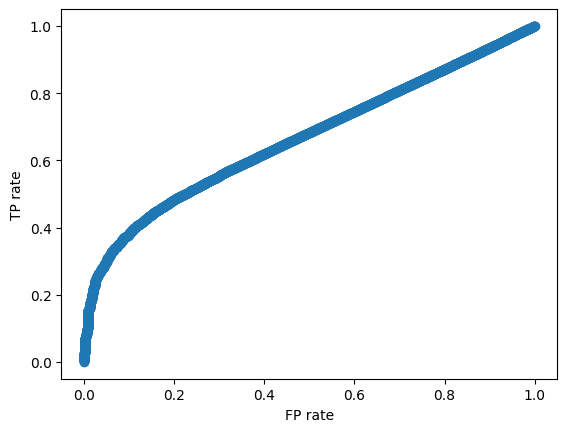

	AUC = 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 + 0.00 +

In [65]:
precision, recall = evaluate('all', q, r)

print("Precision:", precision)
print("Recall:", recall)